In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import kpss,adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.api as sm
import pmdarima as pm
import numpy as np
from datetime import timedelta 

In [21]:
df = pd.read_csv("data.csv")
df.datetime = pd.to_datetime(df.datetime)
df.index = df.datetime
df.drop(columns = ['datetime'], inplace = True)
df.head()

,weather_main,weather_desc,temp,feels_like,temp_min,temp_max,pressure,humidity,visibility,wind_speed,...,Motorcycle_0.9,Motorcycle_0.7,Motorcycle_0.5,Motorcycle_0.3,Motorcycle_0.1,Ambulance_0.9,Ambulance_0.7,Ambulance_0.5,Ambulance_0.3,Ambulance_0.1
datetime,,,,,,,,,,,,,,,,,,,,,
2022-10-04 20:44:39,Clouds,broken clouds,8.60,3.60,7.31,10.04,1008,47,10000,13.89,...,0,0,0,0,0,0,0,0,0,0
2022-10-04 20:49:39,Clouds,broken clouds,8.60,3.60,7.31,10.04,1008,47,10000,13.89,...,0,0,0,0,0,0,0,0,0,0
2022-10-04 20:54:39,Clouds,overcast clouds,8.68,5.07,7.22,10.13,1008,49,10000,7.60,...,0,0,0,0,0,0,0,0,0,0
2022-10-04 20:59:39,Clouds,overcast clouds,8.68,5.07,7.22,10.13,1008,49,10000,7.60,...,0,0,0,0,0,0,0,0,0,0
2022-10-04 21:04:39,Clouds,overcast clouds,8.68,5.07,7.22,10.13,1008,49,10000,7.60,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df = df.replace("None", np.nan) 

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1029 entries, 2022-10-04 20:44:39 to 2022-04-14 23:45:45
Data columns (total 61 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   weather_main            1029 non-null   object 
 1   weather_desc            1029 non-null   object 
 2   temp                    1029 non-null   float64
 3   feels_like              1029 non-null   float64
 4   temp_min                1029 non-null   float64
 5   temp_max                1029 non-null   float64
 6   pressure                1029 non-null   int64  
 7   humidity                1029 non-null   int64  
 8   visibility              1029 non-null   int64  
 9   wind_speed              1029 non-null   float64
 10  wind_angle              1029 non-null   int64  
 11  clouds                  1029 non-null   int64  
 12  maximum_severity        1029 non-null   int64  
 13  total_impacting         1029 non-null   int64  
 14  tota

In [24]:
df = df.apply(lambda x: pd.Series(x.fillna(method='ffill').values))

In [25]:
df.isnull().sum()

weather_main     0
weather_desc     0
temp             0
feels_like       0
temp_min         0
                ..
Ambulance_0.9    0
Ambulance_0.7    0
Ambulance_0.5    0
Ambulance_0.3    0
Ambulance_0.1    0
Length: 61, dtype: int64

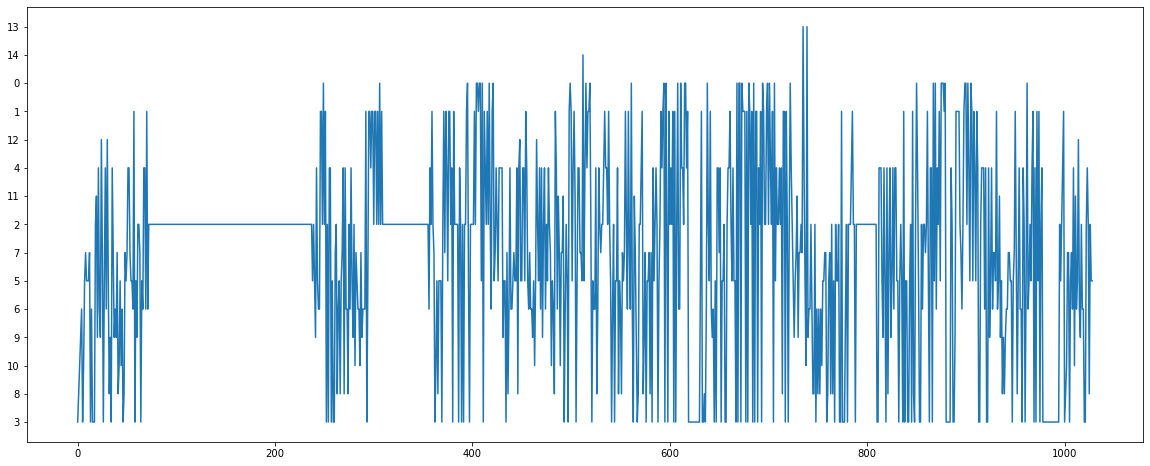

In [26]:
plt.figure(figsize=(20,8))
plt.plot(df["Vehicle_0.1"])
plt.show()

From the plot we can see that there is no trend and seasonality.



In [27]:
X = df["Vehicle_0.1"]
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.231654
p-value: 0.000582
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


We can see that p value of ADF statistics is 0.000582 which smaller than 0.05, thus we reject the null hypothesis and conclude that our series is stationary.

In [28]:
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('number of lags: %f' % result[2])

print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 0.176318
p-value: 0.100000
number of lags: 22.000000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


We have p-value equal to 0.1, which is larger than 0.05, thus we can say that we have stationary time series.

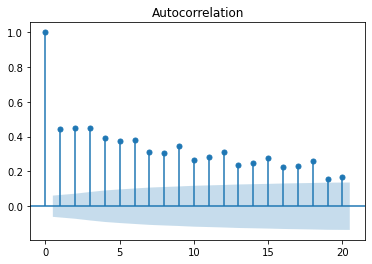

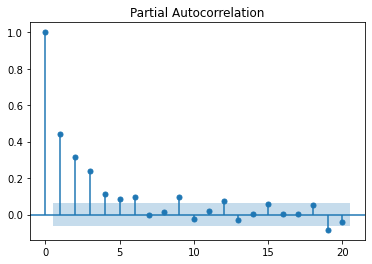

In [29]:
plot_acf(X, lags=20)     
plot_pacf(X, lags=20)     
plt.show()

From the ACF plot we can see that all lags are significant. In PACF we have significant lags till about 9.

In [30]:
total_observations = len(X)
train = X[:int(0.9*total_observations)]
test = X[int(0.9*total_observations):]

In [33]:
model = ARIMA(train.astype(float),order=(20, 1, 9)).fit()

C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [34]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            Vehicle_0.1   No. Observations:                  926
Model:                ARIMA(20, 1, 9)   Log Likelihood               -1937.401
Date:                Sat, 16 Apr 2022   AIC                           3934.803
Time:                        14:41:37   BIC                           4079.697
Sample:                             0   HQIC                          3990.081
                                - 926                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1672      0.196     -0.854      0.393      -0.551       0.216
ar.L2          0.0369      0.169      0.218      0.827      -0.294       0.368
ar.L3         -0.3043      0.179     -1.700      0.089      -0.655       0.047
ar.L4         -0.4007      0.188     -2.135      0.033      -0.768      -0.033
ar.L5         -0.2238      0.211     -1.058      0.290      -0.638       0.191
ar.L6         -0.2813      0.194     -1.449      0.147      -0.662       0.099
ar.L7         -0.3963      0.164     -2.415      0.016      -0.718      -0.075
ar.L8          0.2763      0.179      1.543      0.123      -0.075       0.627
ar.L9         -0.3204      0.108     -2.979      0.003      -0.531      -0.110
ar.L10        -0.3812      0.084     -4.529      0.000      -0.546      -0.216
ar.L11        -0.3143      0.061     -5.114      0.000      -0.435      -0.194
ar.L12        -0.1437      0.064     -2.257      0.024      -0.269      -0.019
ar.L13        -0.2071      0.058     -3.562      0.000      -0.321      -0.093
ar.L14        -0.2385      0.041     -5.877      0.000      -0.318      -0.159
ar.L15        -0.0760      0.052     -1.459      0.144      -0.178       0.026
ar.L16        -0.0963      0.045     -2.159      0.031      -0.184      -0.009
ar.L17        -0.1516      0.040     -3.777      0.000      -0.230      -0.073
ar.L18        -0.0174      0.041     -0.420      0.674      -0.099       0.064
ar.L19        -0.1243      0.040     -3.124      0.002      -0.202      -0.046
ar.L20        -0.1588      0.035     -4.478      0.000      -0.228      -0.089
ma.L1         -0.6571      0.194     -3.389      0.001      -1.037      -0.277
ma.L2         -0.1166      0.222     -0.525      0.599      -0.551       0.318
ma.L3          0.3591      0.199      1.808      0.071      -0.030       0.748
ma.L4          0.1274      0.248      0.513      0.608      -0.360       0.614
ma.L5         -0.1100      0.207     -0.530      0.596      -0.517       0.297
ma.L6          0.1399      0.237      0.591      0.555      -0.324       0.604
ma.L7          0.1150      0.187      0.615      0.539      -0.252       0.481
ma.L8         -0.6364      0.214     -2.971      0.003      -1.056      -0.217
ma.L9          0.6456      0.164      3.939      0.000       0.324       0.967
sigma2         3.8531      0.144     26.760      0.000       3.571       4.135
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               180.47
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.48   Skew:                             0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
predictions = model.forecast(len(test))
residuals = test.astype(float) - predictions

Text(0, 0.5, 'Error')

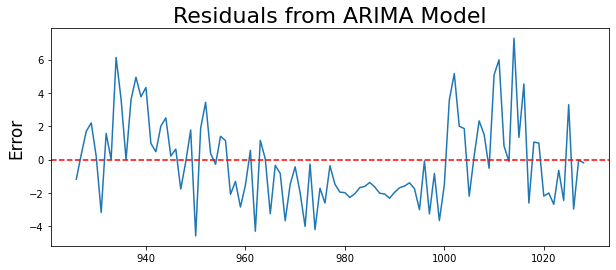

In [38]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='red')
plt.title('Residuals from ARIMA Model', fontsize=22)
plt.ylabel('Error', fontsize=17)

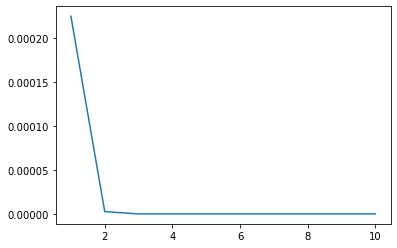

In [39]:
Lj_Box = sm.stats.acorr_ljungbox(residuals, lags = 10,return_df = True)
plt.plot(Lj_Box.index, Lj_Box.lb_pvalue)

We can see that the p-value for different lags is less than 0.05 and almost 0, so we can reject the null hyppthesis, meaning that time series isn't autocorrelated. ADD SOMETHING HERE

In [43]:
#CHECK WHETHER THE PARAMETERS ARE RIGHT OR NOT
model_auto=pm.auto_arima(
    train,
    test='adf',
    seasonal=False,
    start_P=0,
    max_p = 20,
    max_d = 20,
    max_q = 12,
    trace=True,
    error_action='ignore', 
    suppress_warnings=True,
    stepwise=True,
    n_fits=100,
    maxiter=100)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=3952.128, Time=0.57 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5337.120, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=4325.314, Time=0.14 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=4869.958, Time=0.22 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3949.580, Time=0.78 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=4663.084, Time=0.37 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3948.129, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=3949.542, Time=0.73 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=4108.145, Time=0.24 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=3934.361, Time=1.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=4185.146, Time=0.41 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=4109.356, Time=0.27 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=3934.354, Time=1.23 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=4013.411, Time=0.58 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept

In [45]:
print('MSE of the AUTOARIMA model is', np.mean((model_auto.predict(len(test))-test.astype("float"))**2))

MSE of the AUTOARIMA model is 6.58360315815928


In [47]:
print('MSE of the previously chosen model is', np.mean((model.predict(len(train) + 1, len(train) + len(test)) - test.astype("float")) **2))

MSE of the previously chosen model is 6.404482992916039


We can observe that the MSE of the previous model was better, meaning that it is better if we take into consideration MSEs.

In [61]:
model_auto = ARIMA(X.astype("float"), order=(20,1,9)).fit()
predictions = model_auto.predict(len(X) + 1, len(X) + 12)
summed = np.cumsum(predictions)
df.rename(columns = {'Vehicle_0.1':'Vehicle_0_1'}, inplace = True)

summed += df.Vehicle_0_1.iloc[-1]

dates = [df.index[-1] + timedelta(days = 7)]
for i in range(11):
    dates.append(dates[i] + timedelta(days = 7))

C:\Users\User\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

In [60]:
fig = plt.figure(figsize = (12,12))
plt.plot(dates, summed, c= 'red')
df.Vehicle_0_1.plot()
plt.show()

NameError: name 'dates' is not defined

<Figure size 864x864 with 0 Axes>